# Mall Customers Segmentation using K-Means Clustering

In [53]:
# Importing libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
d_customer = pd.read_csv('Mall_Customers.csv')
print(d_customer.head()) 

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(d_customer.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Basic statistics of numerical columns:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.25000

In [54]:
# Count the number of unique values in each column
print("\nCount of unique values in each column:")
print(d_customer.nunique())

# Grouping by 'Genre' and calculating the mean of numerical columns
print("\nMean values by 'Genre':")
print(d_customer.groupby('Genre').mean())

# Correlation matrix
print("\nCorrelation matrix:")
print(d_customer.corr())


Count of unique values in each column:
CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

Mean values by 'Genre':
        CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Genre                                                                    
Female   97.562500  38.098214           59.250000               51.526786
Male    104.238636  39.806818           62.227273               48.511364

Correlation matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age             

/tmp/ipykernel_5851/2447811692.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(d_customer.corr())


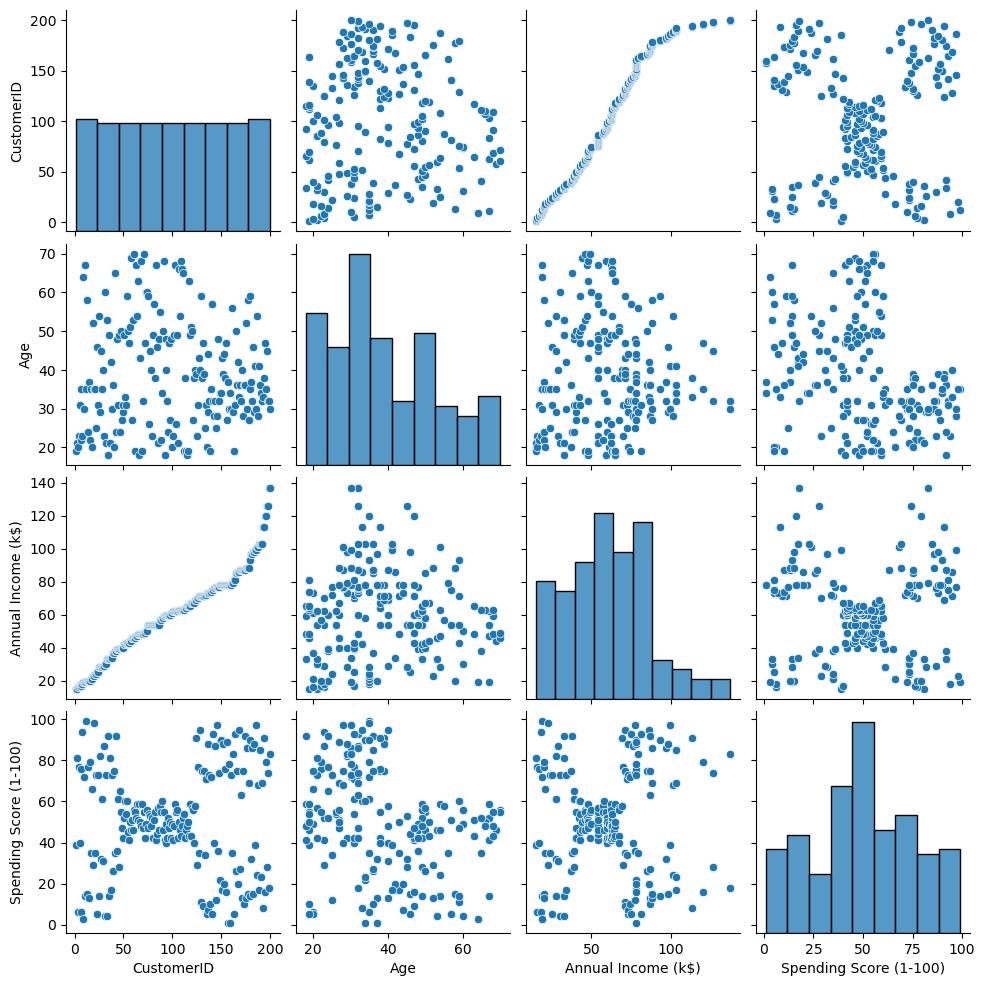

In [55]:
sns.pairplot(data=d_customer)
plt.show()

Observations:

Most of the customers are in the 20-40 age group.

Spending score is high for the customers in the age group of 20-40.

Spending score is high for customers with very low and very high income.

# Heatmap

/tmp/ipykernel_5851/3016080396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d_customer[['Age','Genre', 'Annual Income (k$)', 'Spending Score (1-100)' ]].corr(), cmap ='magma_r', annot =True, linewidth=.5)


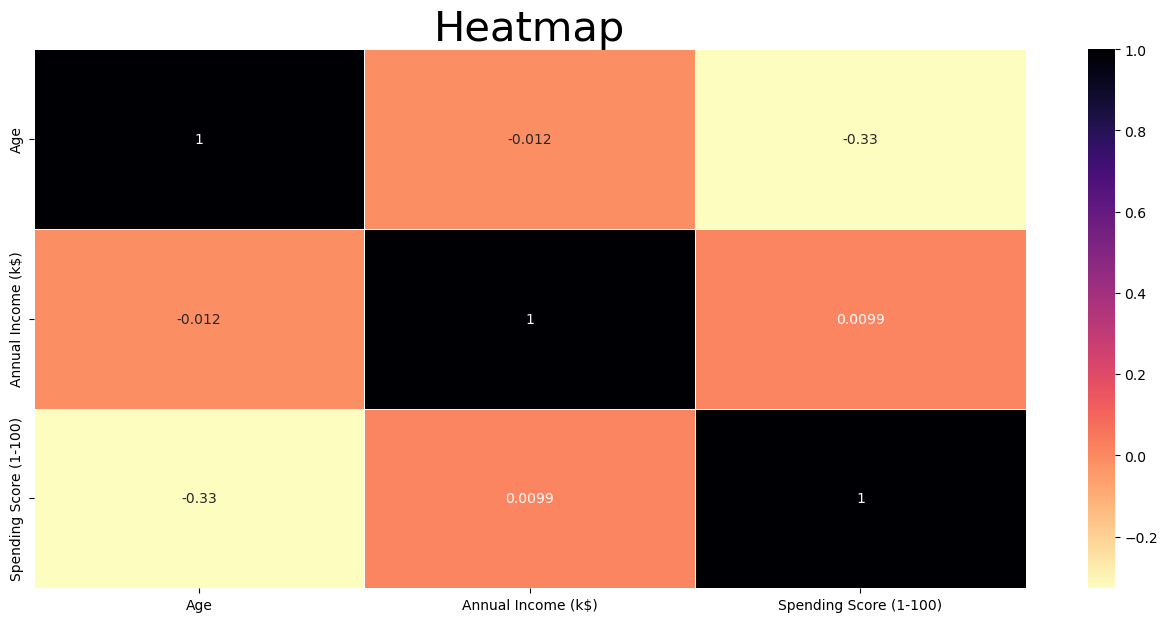

In [57]:
plt.rcParams['figure.figsize']=(16, 7)
sns.heatmap(d_customer[['Age','Genre', 'Annual Income (k$)', 'Spending Score (1-100)' ]].corr(), cmap ='magma_r', annot =True, linewidth=.5)
plt.title('Heatmap', fontsize=30)
plt.show()

From the above plot, it's clear that there is multicollinearity in the dataset.

# K - Means Clustering

Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)
0  27.000000           56.657895               49.131579
1  56.333333           54.266667               49.066667
2  32.692308           86.538462               82.128205
3  41.264706           88.500000               16.764706
4  45.523810           26.285714               19.380952
5  25.000000           25.260870               77.608696


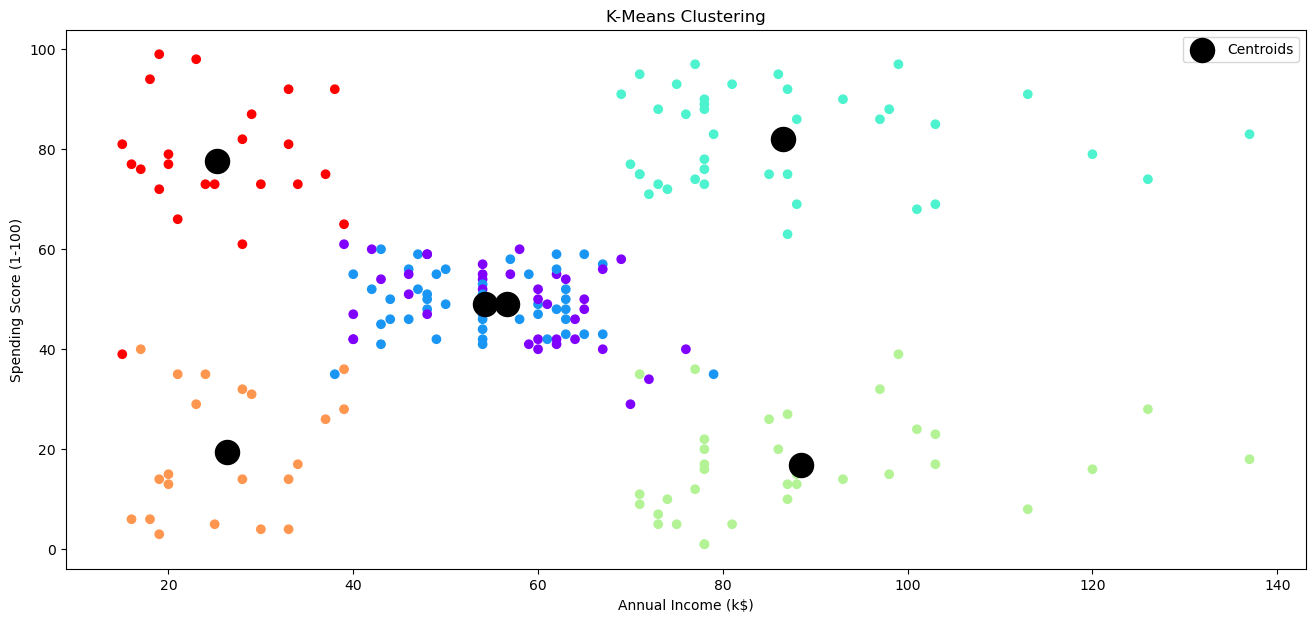

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select relevant columns for clustering
X = d_customer[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
d_customer['Cluster'] = kmeans.labels_

# Print the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("Cluster Centers:")
print(cluster_centers_df)

# Visualize the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


Let's perform k-means clustering based on annual income.

We will be using elbow method to find optimal numbers of clusters. Using the within-cluster-sum-of-square (WCSS) score.

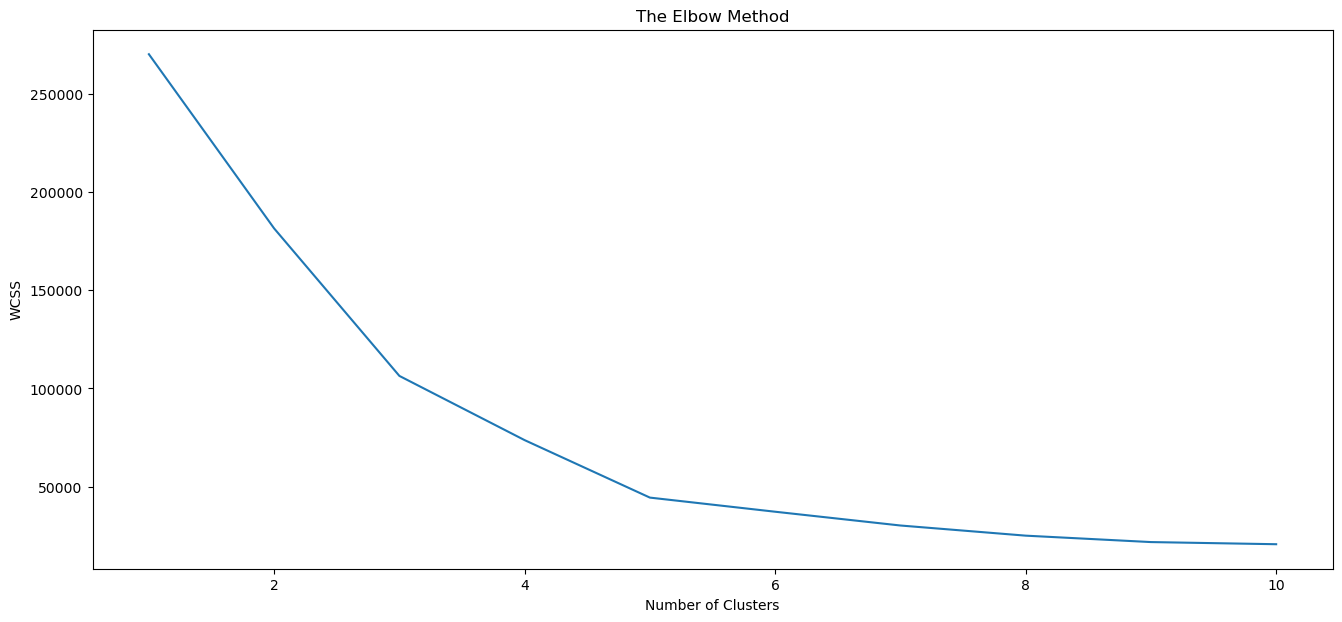

In [59]:
# Elbow point pretty visible.

data=d_customer.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)# inertia_ = to find the wcss value
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above figure, we can see that last most significant slope occurs at k = 5 , hence we will have 5 clusters in this case.

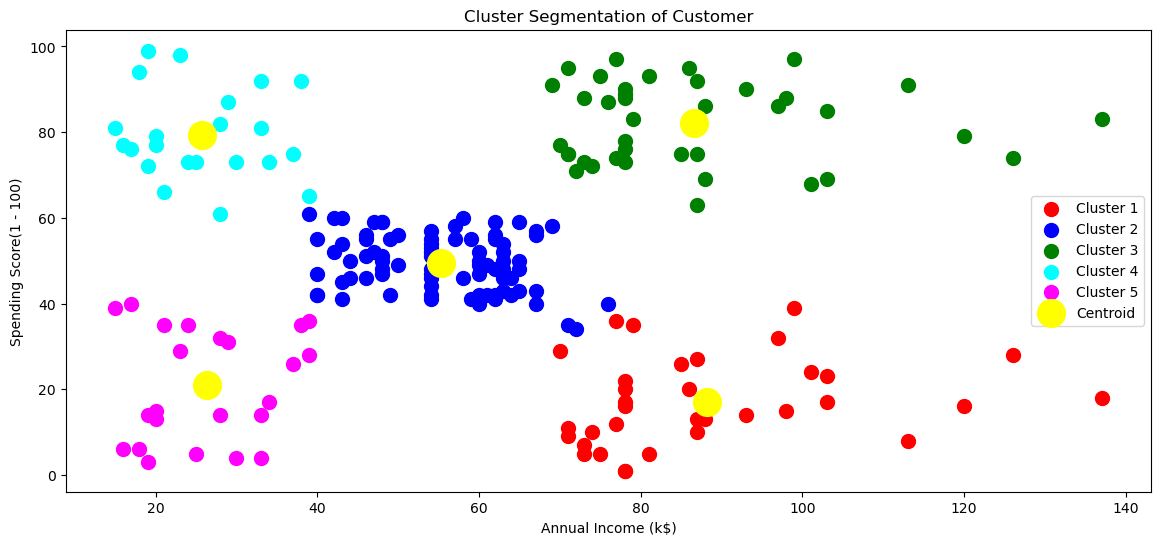

In [60]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the clusters
fig,ax = plt.subplots(figsize=(14, 6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100, c='blue', label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100, c='green', label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100, c='cyan', label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100, c='magenta', label='Cluster 5')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1 - 100)')
plt.legend()
plt.show()

# K-Means Clustering based on Age

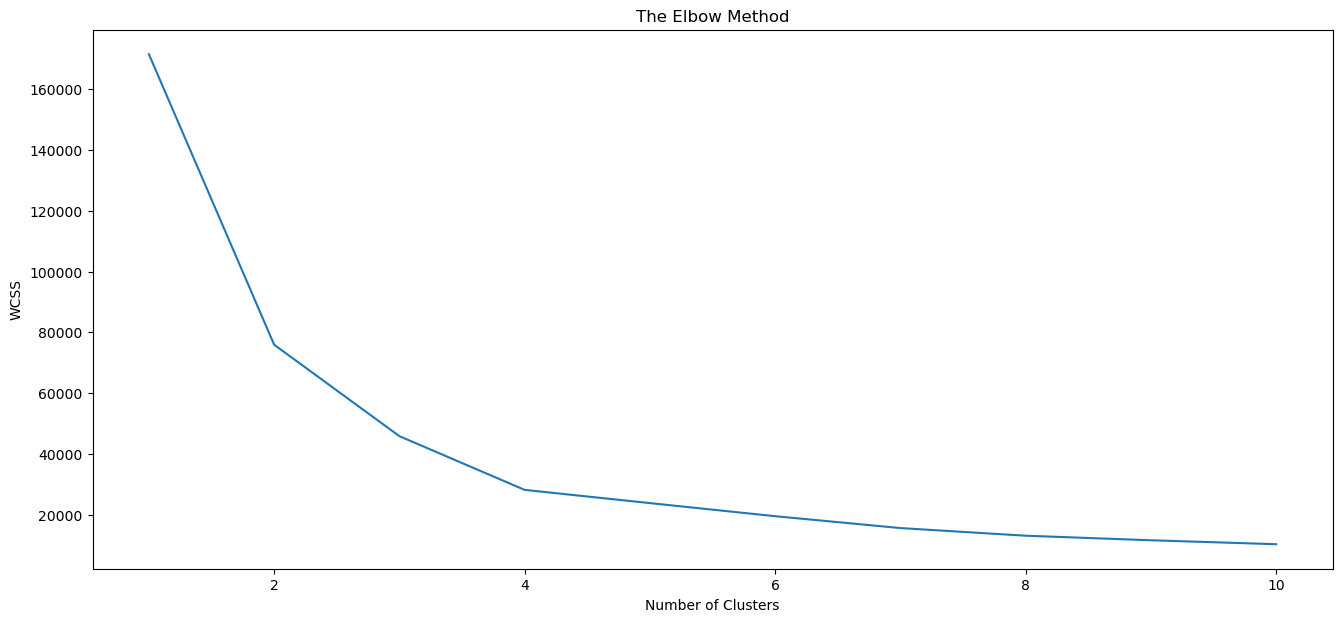

In [61]:
# Elbow point pretty visible.

data=d_customer.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)# inertia_ = to find the wcss value
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above figure, we can see that last most significant slope occurs at k = 4 , hence we will have 4 clusters in this case.

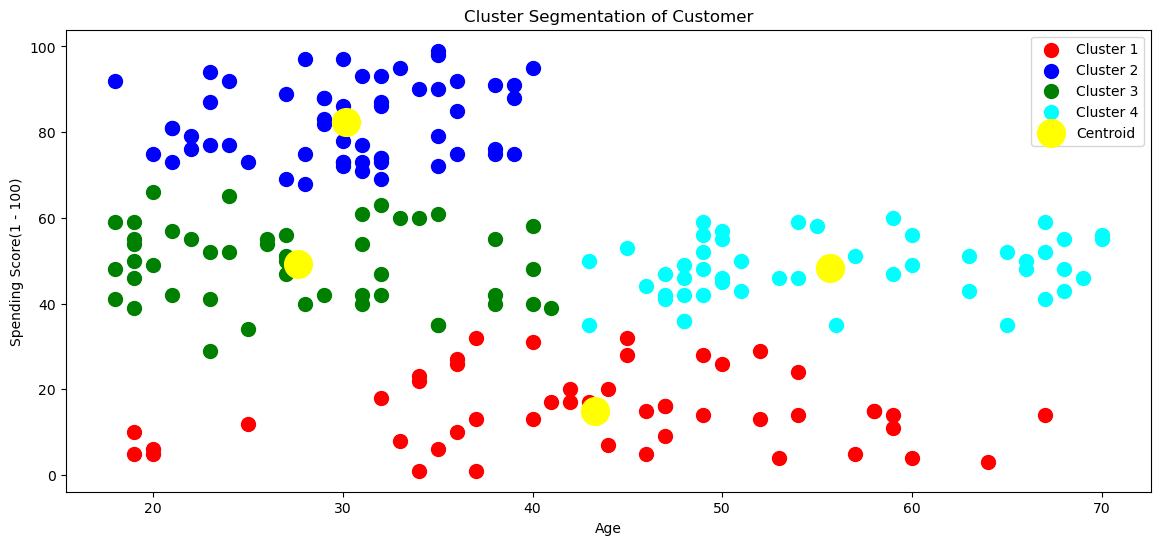

In [62]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the clusters
fig,ax = plt.subplots(figsize=(14, 6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100, c='blue', label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100, c='green', label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100, c='cyan', label='Cluster 4')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customer')
plt.xlabel('Age')
plt.ylabel('Spending Score(1 - 100)')
plt.legend()
plt.show()

# Conclusion

Using on the k-means clustering we have managed to form different clusters based on different features. Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new innovative ideas to upgrade the customers with low spending score.